# COMP5046 Assignment 1
*Make sure you change the file name with your unikey.*

# Readme
*If there is something to be noted for the user, please mention here.* 

In order to download data and model and to start the chatbot using these pretrained models, run the block 3.5.1

In order to train and save the model in google drive please run 3.5.1 and then to start the chatbot please run 3.5.2.
The trained model files will be saved in My drive section of the google drive with names like word_embedding_model or model_comic etc.
Note: It will require two fold authentication from google drive first to download data and then for writing to the drive.

Also word clouds have been generated in section 3.1 and 3.5 to emphasis upon the effect of different preprocessing techniques.

# 1 - Data Preprocessing (Personality chat datasets)

## 1.1. Download Dataset (Personality chat datasets)

In [1]:
import json
import re
import string
import time
import tensorflow as tf
import numpy as np
import pandas as pd
import nltk
import math
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

lemmatizer = WordNetLemmatizer()
porter = PorterStemmer()

nltk.download('punkt')

#function to download the 3 datasets from google drive
def download_data_n_writes_to_drive():
  # Code to download file into Colaboratory:
  !pip install -U -q PyDrive
  from pydrive.auth import GoogleAuth
  from pydrive.drive import GoogleDrive
  from google.colab import auth
  from oauth2client.client import GoogleCredentials
  # Authenticate and create the PyDrive client.
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)

  #Download all datasets from Google drive
  id_1 = '1DTZ6pyqNI3481eNUhAX3Nz_Uz9Oa4dyM'
  downloaded = drive.CreateFile({'id':id_1}) 
  downloaded.GetContentFile('qna_chitchat_the_professional.tsv')
  df1 = pd.read_csv('qna_chitchat_the_professional.tsv', sep="\t")

  id_2 = '1C9HCDO08qTziFGKfdDcX_zTHkIs6LQ8Q'
  downloaded = drive.CreateFile({'id':id_2}) 
  downloaded.GetContentFile('qna_chitchat_the_friend.tsv')
  df2 = pd.read_csv('qna_chitchat_the_friend.tsv', sep="\t")

  id_3 = '1t0u4bwsa6O3_lUkMvTLH9D45cQUUjoai'
  downloaded = drive.CreateFile({'id':id_3}) 
  downloaded.GetContentFile('qna_chitchat_the_comic.tsv')
  df3 = pd.read_csv('qna_chitchat_the_comic.tsv', sep="\t") 
  
  #Enables saving model files to your GoogleAccount
  from google.colab import drive
  drive.mount('/content/gdrive')
  data = [df1, df2, df3]
  return data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
def download_data_and_models():
  # Code to download file into Colaboratory:
  !pip install -U -q PyDrive
  from pydrive.auth import GoogleAuth
  from pydrive.drive import GoogleDrive
  from google.colab import auth
  from oauth2client.client import GoogleCredentials
  # Authenticate and create the PyDrive client.
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)

  #Download all datasets from Google drive
  id_1 = '1DTZ6pyqNI3481eNUhAX3Nz_Uz9Oa4dyM'
  downloaded = drive.CreateFile({'id':id_1}) 
  downloaded.GetContentFile('qna_chitchat_the_professional.tsv')
  df1 = pd.read_csv('qna_chitchat_the_professional.tsv', sep="\t")

  id_2 = '1C9HCDO08qTziFGKfdDcX_zTHkIs6LQ8Q'
  downloaded = drive.CreateFile({'id':id_2}) 
  downloaded.GetContentFile('qna_chitchat_the_friend.tsv')
  df2 = pd.read_csv('qna_chitchat_the_friend.tsv', sep="\t")

  id_3 = '1t0u4bwsa6O3_lUkMvTLH9D45cQUUjoai'
  downloaded = drive.CreateFile({'id':id_3}) 
  downloaded.GetContentFile('qna_chitchat_the_comic.tsv')
  df3 = pd.read_csv('qna_chitchat_the_comic.tsv', sep="\t")

  #Download the already trained professional model from google drive
  id_models = '1Ol5r1E_46ZV_lYSKhls64J0ROWfJm58V'
  downloaded = drive.CreateFile({'id':id_models}) 
  downloaded.GetContentFile('model_professional.cpkt.meta')
  
  id_models = '1tBNZ75Ftpt29H3m_c7Q0mJBHvmUOGK1A'
  downloaded = drive.CreateFile({'id':id_models}) 
  downloaded.GetContentFile('model_professional.cpkt.index')
  
  id_models = '13KNj35DzFeoAANT2bngLWAORxF0__flg'
  downloaded = drive.CreateFile({'id':id_models}) 
  downloaded.GetContentFile('model_professional.cpkt.data-00000-of-00001')
  
  id_models = '1GxeUojfuE4e19s3J7G_ro_nNclCiefUK'
  downloaded = drive.CreateFile({'id':id_models}) 
  downloaded.GetContentFile('checkpoint')
  
  #Download files for friend model from G drive
  id_models = '1-KCQCCJRNyXm9vNx0_swvr7weH4iiBQB'
  downloaded = drive.CreateFile({'id':id_models}) 
  downloaded.GetContentFile('model_friend.cpkt.meta')
  
  id_models = '1-7kkuHUro4SuYkxSk9GqG30uxxdt50sA'
  downloaded = drive.CreateFile({'id':id_models}) 
  downloaded.GetContentFile('model_friend.cpkt.index')
  
  id_models = '1-0k9rhRgfAAjLLHjYLUjqUrOzuDKLhL5'
  downloaded = drive.CreateFile({'id':id_models}) 
  downloaded.GetContentFile('model_friend.cpkt.data-00000-of-00001')
  
  id_models = '1-AnvH1CYXZhNpYWHaslZYJKzWbTvMxum'
  downloaded = drive.CreateFile({'id':id_models}) 
  downloaded.GetContentFile('checkpoint')
  
  #Download files for comic model from G drive
  id_models = '1-ZLITuLq4UBjMEAFniy4RkYJATihktuh'
  downloaded = drive.CreateFile({'id':id_models}) 
  downloaded.GetContentFile('model_comic.cpkt.meta')
  
  id_models = '1-Yp3ikHgdMDR1NZw0bbYlPkU6vdKc5fa'
  downloaded = drive.CreateFile({'id':id_models}) 
  downloaded.GetContentFile('model_comic.cpkt.index')
  
  id_models = '1-SAgJ-1MKaCqIvaPjr5s-fHUrECAz0dc'
  downloaded = drive.CreateFile({'id':id_models}) 
  downloaded.GetContentFile('model_comic.cpkt.data-00000-of-00001')
  
  id_models = '1-Z8F3WfKvTmlgK1n5JWzmmjl05wmRS1M'
  downloaded = drive.CreateFile({'id':id_models}) 
  downloaded.GetContentFile('checkpoint')
  
  #Download files for word_embedding model from G drive
  id_models = '1XLufhvp0JCkMKR4MU62natsaq0TlbQ94'
  downloaded = drive.CreateFile({'id':id_models}) 
  downloaded.GetContentFile('word_embedding_model.cpkt.meta')
  
  id_models = '1lRE4X3l7uqiFkF7eWBkC5mWDq1McoK26'
  downloaded = drive.CreateFile({'id':id_models}) 
  downloaded.GetContentFile('word_embedding_model.cpkt.index')
  
  id_models = '1tcPZct9EwoyM7DY-MBMKcVa_y3eAgpMR'
  downloaded = drive.CreateFile({'id':id_models}) 
  downloaded.GetContentFile('word_embedding_model.cpkt.data-00000-of-00001')
  
  id_models = '1_dvuh0_77_3ERR6ZoMJLutAPgCEzlQ0V'
  downloaded = drive.CreateFile({'id':id_models}) 
  downloaded.GetContentFile('checkpoint')
  
  data = [df1, df2, df3]
  
  return data

## 1.2. Preprocess data (Personality chat datasets)

*You are required to describe which data preprocessing techniques were conducted with justification of your decision. *

Contractions: The dataset has a lot of contractions. Therefore we can preprocess the dataset with respect to contractions. This will help in effective training of the classifier and will not confuse it, as otherwise the classifier will consider contracted word as different than their non contracted counterparts.

Stopwords removal: The stopwords are words which are very much frequent in the document and do not contribute too much to semantic understanding of the chats. Removing them reduces computation time, reduces dimensionality of the data. This also comes at a loss of contextual understanding but the chats meanings would be more driven by an important word rather than words like 'a', 'an', 'the' etc. Hence they are removed. However, in task like sentiment analysis stopowords removal needs to be given a second thought. 

Numbers Removal: The numbers data, were removed from the dataset. They being few in numbers will only confuse the classifier and thus, will not help in effective training.

Decapitalization: All the strings in the dataset were decapitalize to maintain uniformity as well as reduce redundancy or the data dimensionality. This augers well for the computation time and training of classifier.

Lemmatising and Stemming: These techniques were also employed to enrich the databse by reducing redundancy, two words like reacts and its stemmed version react have same semantic meaning. Hence, these techniques were applied too. However, they were applied while making the batch and not in the pre process section.

As it can be seen in the word clouds in the section 3, as we do pre processing noisy or not so informative words gets removed and more important words comes to the attention.

####Effect of different Preprocessing 

In [0]:
#Functions written to generate word clouds
def remove_punctuation_re(x):
    x = str(x)
    x = re.sub(r'[^\w\s]','',x)
    return x
def preprocess(text, punctuations=False, decapitalisation=False, stopword=False): #preprocessing
      if punctuations == True:
        text_nopun = remove_punctuation_re(text)
      else:
        text_nopun = text
      if decapitalisation == True:
        str(text_nopun).lower()
      if stopword == True:
        tokens = word_tokenize(str(text_nopun))
        text_nopun_no_sw = [w for w in tokens if not w in stopwords.words('english')]
      else:
        text_nopun_no_sw = text_nopun
      text = text_nopun_no_sw
      if stopword == False:
        text = word_tokenize(text)
      return text

def display_cloud(text):
      counts = Counter(text)
      wordcloud = WordCloud().generate_from_frequencies(counts)
      plt.imshow(wordcloud, interpolation='bilinear')
      plt.axis("off")
      plt.show()    
    
def call_display_cloud(data):
  text =[]
  for index, row in data.iterrows():

      question = row['Question']
      answer = row['Answer'] 
      text.append(question)
      text.append(answer)
  
  text = " ".join(text)
  text = str(text)
  text = preprocess(text, punctuations=False, decapitalisation=True, stopword=False)
  print("No punctuation & stopword removal but decapitalisation only")
  display_cloud(text)

  text = preprocess(text, punctuations=False, decapitalisation=True, stopword=True)
  print("No punctuation but stopwords removed and decapitalisation done")
  display_cloud(text)

  text = preprocess(text, punctuations=True, decapitalisation=True, stopword=True)
  print("Punctuations, decapitlaisation and stopwords removed")
  display_cloud(text)

### Preprocess chat dataset

In [0]:
# These are just common English contractions.
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", 
                    "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                    "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", 
                    "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", 
                    "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", 
                    "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
                    "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", 
                    "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                    "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                    "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", 
                    "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                    "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
                    "so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", 
                    "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", 
                    "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", 
                    "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", 
                    "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", 
                    "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
                    "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", 
                    "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
                    "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                    "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

# The 3 datasets are preprocessed one by one by using for loop
def preprocess_seq2seq_data(data):
  all_dicts = []
  all_seq_data = []
  all_max_input_words = []
  all_max_output_words = []
  all_unique_words = []

  for index1, item in enumerate(data):
    seq_data = []
    whole_words = []
    max_input_words_amount = 0
    max_output_words_amount = 1


    for index, row in item.iterrows():

        question = row['Question']
        
        # Decapitalisation
        question = question.lower()                                               
        answer = row['Answer']
        
        # removes punctuation in a string
        question = question.translate(str.maketrans('', '', string.punctuation))  
        
        # Question and answer pair stored in seq data
        seq_data.append([question, answer])                                       

        # Question tokenized
        tokenized_q = word_tokenize(question)          
        
        # Removes numeric data
        words = [word for word in tokenized_q if word.isalpha()]
        
        # Stopword removal
        filtered_sentence = [w for w in words if not w in stopwords.words()]      
        
        for i, key in enumerate(filtered_sentence):
          if key in contraction_dict:
            filtered_sentence[i] = contraction_dict[key]
          else:
            continue

        tokenized_q = filtered_sentence
        # we do not need to tokenise answer (because we implement N to One model)
        # make a list with only one element (whole sentence)
        tokenized_a = [answer]

        # add question list and answer list (one element)
        whole_words += tokenized_a
        whole_words += tokenized_q

        # we need to decide the maximum size of input word tokens
        max_input_words_amount = max(len(tokenized_q), max_input_words_amount)


    # we now have a vocabulary list
    # adding special tokens in the vocabulary list    
    # _B_: Beginning of Sequence
    # _E_: Ending of Sequence
    # _P_: Padding of Sequence - for different size input
    # _U_: Unknown element of Sequence - for different size input
    unique_words = list(sorted(set(whole_words)))
    unique_words.append('_B_')
    unique_words.append('_E_')
    unique_words.append('_P_')
    unique_words.append('_U_')

    all_unique_words.append(unique_words)

    num_dic = {n: i for i, n in enumerate(unique_words)}
    
    # Each of them contains 3 elements, one for each dataset
    all_dicts.append(num_dic)
    all_seq_data.append(seq_data)
    all_max_input_words.append(max_input_words_amount)
    all_max_output_words.append(max_output_words_amount)
  return all_dicts, all_seq_data, all_max_input_words, all_unique_words, all_max_output_words 

# 2 - Model Implementation

## 2.1. Word Embeddings

*You are required to describe which model was implemented (i.e. Word2Vec with CBOW, FastText with SkipGram, etc.) with justification of your decision *

*I used Skip gram method on tensorflow to build the word embedding model. The reason behind selecting skipgram was its ability to predict the context word on basis of center words. As is said in linguistics,  meaning of a word lies in the context its used in, therefore predicting context words will certainly help in understanding the conversation. In any conversation, the user uses some important words that holds the semantic meaning of the sentence. If we can predict the right context words for this keyword, then we can develop a robust Word2Vec.*

### 2.1.1. Download Dataset for Word Embeddings



*You are required to describe which data was used with justification of your decision.*

*I used the three microsoft chat datsets by combining them to build the skip gram based word2Vec model . The reason behind choosing the dataset was the vocabulary similarity. With skip gram if a particular vector is not present in the vocabulary, we would have no or a random vector representation. Therefore, to minimise these scenarios, I choose to train the Skip gram on the chat dataset rather than any other dataset.*

### 2.1.2. Data Preprocessing for Word Embeddings

*You are required to describe which preprocessing techniques were used with justification of your decision.*

The preprocessing techniques used are:
Decapitalization: This was done because we deal here with semantic understandings which would be same irrespective of the word in lower or upper case. Thus, decapitalising will help in improved training as both lower and upper case data would be represented by lower case, thus reducing redundancy and improving prediction.

Contraction: The same understanding applies for this. Since the contraction and the non contraction inputs have similar meanings and therefore should be treated as one while training.

Stopwords & numeric data: These  are removed as they play no significant role in semantic undrstanding of a conversation. Adding them will most likely confuse our classifier.

Punctuation: Usage of words with punctuation will not be helpful in developing an accurate word2 Vec model. Therefore, punctuations have been removed.



In [0]:
def preprocess_word_embed_data(data, window_size = 2):
  lst = []
  # Lets get all the questions and answers of 3 dataset in a single list
  for index1, item in enumerate(data):
    for index, row in item.iterrows():

      question = row['Question']
      question = question.lower()
      answer = row['Answer'] 
      answer = answer.lower()
      lst.append(question)
      lst.append(answer)

  word_sequence = " ".join(lst).split() 
  word_list = " ".join(lst).split()     # splits the data by whitespaces

  #stopwords removal
  filtered_words = [w for w in word_list if not w in stopwords.words()]
  # Removes numbers
  filtered_words = [word for word in filtered_words if word.isalpha()]
  # Contraction treatment
  for i, key in enumerate(filtered_words):
    if key in contraction_dict:
      filtered_words[i] = contraction_dict[key]
    else:
      continue

  # punctuation removal 
  for i in range(len(filtered_words)):
    filtered_words[i] = filtered_words[i].translate(str.maketrans('', '', string.punctuation)) 

  filtered_words.append('_B_')
  filtered_words.append('_E_')
  filtered_words.append('_P_')
  filtered_words.append('_U_')
  
  word_list = list(sorted(set(filtered_words)))

  # make dictionary so that we can be reference each index of unique word
  word_dict = {w: i for i, w in enumerate(word_list)}

  # Making window_size skip-gram
  skip_grams = []
  for i in range(window_size, len(filtered_words) - window_size):
      # (context, target) : ([target index -2, target index - 1, target index + 1, target index + 1], target)
      target = word_dict[filtered_words[i]]
      #context = [word_dict[filtered_words[i - 2]], word_dict[filtered_words[i - 1]], word_dict[filtered_words[i + 1]], word_dict[filtered_words[i + 2]]]
      
      context = [word_dict[filtered_words[k]] for k in range(i-window_size, i + window_size +1) if k!=i]
      
      # skipgrams - (target, context[0]), (target, context[1]), (target, context[2]), (target, context[3])..
      for w in context:
          skip_grams.append([target, w])
  return skip_grams, word_list, word_dict

### 2.1.3. Build Word Embeddings Model

*You are required to describe how hyperparameters were decided with justification of your decision.*

The word embedding model was run with different hyper parameters and the result obtained are as below:

<table>
  <thead>
    <tr>
      <th>Learning Rate</th>
      <th>Embedding Size</th>
      <th>Window Size</th>
      <th>Time (sec)</th>
      <th>Cosine Similarity on Glad and Happy</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0.01</td>
      <td> 16	</td>
      <td>1			</td>
      <td>85</td>
      <td>0.7801</td>
    </tr>
    <tr>
      <td>0.1</td>
      <td>16</td>
      <td>1</td>
      <td>86</td>
      <td>0.2357</td>
    </tr><tr>
      <td>0.001</td>
      <td>16</td>
      <td>1</td>
      <td>86</td>
      <td>0.714</td>
    </tr><tr>
      <td>0.01</td>
      <td> 32	</td>
      <td>1			</td>
      <td>88</td>
      <td>0.541</td>
    </tr><tr>
      <td>0.01</td>
      <td>64</td>
      <td>1			</td>
      <td>91</td>
      <td>0.4682</td>
    </tr><tr>
     <td>0.01</td>
      <td>128</td>
      <td>1			</td>
      <td>98</td>
      <td>0.3533</td>
    </tr>
    <tr>
      <td>0.01</td>
      <td>16</td>
      <td>2</td>
      <td>87</td>
      <td>0.8752</td>
    </tr>
    <tr>
       <td>0.01</td>
      <td>32</td>
      <td>2</td>
      <td>90</td>
      <td>0.5738</td> 
    </tr>
    <tr>
       <td>0.01</td>
      <td>16</td>
      <td>3</td>
      <td>89</td>
      <td>0.7453</td> 
    </tr>
    <tr>
      <td>0.01</td>
      <td>16</td>
      <td>4</td>
      <td>91</td>
      <td>0.8052</td> 
    </tr>
    <tr>
      <td>0.01</td>
      <td>16</td>
      <td>5</td>
      <td>92</td>
      <td>0.7522</td> 
    </tr>
  </tbody>
</table>

Therefore on this basis, a window size of 5 was selected with Learning rate as 0.01, embedding size as 16. (Note: window size 5 gave more consistent results than window size 4 and hence 5 was selected)




In [0]:
#Prepares the batch for word embedding model

def prepare_batch(data, size):
    inputs = []
    labels = []
    random_index = np.random.choice(range(len(data)), size, replace=False)
    for i in random_index:
        inputs.append(data[i][0])  # target
        labels.append([data[i][1]])  # context word

    return inputs, labels

### 2.1.4. Train Word Embeddings Model and Save model

The epoch was decided on the basis of training loss. it was observed that after 11000~12000 epochs the training loss stabilises and doesnot fluctuates much. Hence, no of epoch were fixed at 15000

In [0]:
# Trains the word embedding model and saves the model in the google drive
def train_save_word_embed(skip_grams, word_list, learning_rate = 0.01, embedding_size = 32):
  tf.reset_default_graph()

  # sampling size for nce_loss function (cost function)
  # must be lower than batch_size
  sample_size = 100
  batch_size = 10000

  voc_size = len(word_list)

  inputs = tf.placeholder(tf.int32, shape=[batch_size])
  # placeholder (output) of function tf.nn.nce_loss()
  labels = tf.placeholder(tf.int32, shape=[batch_size, 1])

  # word2vec Model
  embeddings = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0), name ="embeddings")
  # i.e.)  embeddings       inputs       selected
  #       [[1, 2, 3]   ->   [2, 3]   -> [[2, 3, 4]
  #        [2, 3, 4]                    [3, 4, 5]]
  #        [3, 4, 5]
  #        [4, 5, 6]]
  selected_embed = tf.nn.embedding_lookup(embeddings, inputs)

  # weight and bias for nce_loss() function
  nce_weights = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))
  nce_biases = tf.Variable(tf.zeros([voc_size]))

  cost_op = tf.reduce_mean(
              tf.nn.nce_loss(nce_weights, nce_biases, labels, selected_embed, sample_size, voc_size))

  train_op = tf.train.AdamOptimizer(learning_rate).minimize(cost_op)
  init = tf.global_variables_initializer()
  with tf.Session() as sess:
      sess.run(init)
      saver_we = tf.train.Saver()
      no_of_epochs = 1500
      display_interval = 100
      print("Training word embedding model: ")
      for epoch in range(no_of_epochs):
          batch_inputs, batch_labels = prepare_batch(skip_grams, batch_size)
          sess.run(train_op, feed_dict={inputs:batch_inputs, labels:batch_labels})    

          if epoch % display_interval == 0 :
              # calculate the cost/accuracy of the current model
              cost = sess.run(cost_op, feed_dict={inputs:batch_inputs,
                                                    labels:batch_labels})
              print("Epoch " + str(epoch) + ", Cost= " + 
                      "{:.4f}".format(cost))

      # assign the learned embeddings for display on matplot
      # within 'with'  you can use eval() instead of sess.run()
      model_fil_name = "word_embedding_model.cpkt"
      path_drive = F"/content/gdrive/My Drive/{model_fil_name}"
      path_local = model_fil_name
      saver_we.save(sess, path_drive)
      saver_we.save(sess, path_local)
      trained_embeddings = embeddings.eval()

  return

### 2.1.6. Load Word Embeddings Model

In [0]:
#Loads word embedding model and returns an array of vectors of trained words
def load_word_embed():
  graph_we = tf.Graph()
  with tf.Session(graph = graph_we) as sess:
      #path = F"/content/gdrive/My Drive/Colab Notebooks/Trained Models/Word Embedding/word_embedding_model.cpkt"
      path = "word_embedding_model.cpkt"
      saver_word_embed = tf.train.import_meta_graph(path+".meta")
      saver_word_embed.restore(sess, path)
      embeddings2 = graph_we.get_tensor_by_name("embeddings:0")
      trained_embeddings = embeddings2.eval()
  return trained_embeddings

## 2.2. Seq2Seq model

### 2.2.1. Hyper parameters fine tuning method


Hyperparameters for sequence 2 sequence model

The sequence 2 sequence model was fine tuned by entrinsic user based evaluation. A set of 15 fixed questions, were asked by the user from the chat for different hyper parameters. The set of hyper parameters which gave the most reasonable and consistent response was choosen.

<table>
  <thead>
    <tr>
      <th>Learning Rate</th>
      <th> N_Hidden nodes</th>
      <th>Time (sec)</th>
      <th>Extrinsic User Evaluation (Poor/Average/Good/Excellent)</th>
      <th>Score on 15 questions based on relevancy of the reply from the bot</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0.01</td>
      <td> 32	</td>
      <td>120		</td>
      <td>Good</td>
      <td>11/15</td>
    </tr>
    <tr>
      <td>0.01</td>
      <td>64</td>
      <td>141</td>
      <td>Good</td>
      <td>10/15</td>
    </tr><tr>
      <td>0.01</td>
      <td>128</td>
      <td>192</td>
      <td>Average</td>
      <td>9/15</td>
    </tr><tr>
      <td>0.01</td>
      <td> 256	</td>
      <td>312	</td>
      <td>Average</td>
      <td>8/15</td>
    </tr><tr>
      <td>0.1</td>
      <td>32</td>
      <td>121	</td>
      <td>Poor</td>
      <td>4/15</td>
    </tr>
    <tr>
     <td>0.001</td>
      <td>32</td>
      <td>121</td>
      <td>Poor</td>
      <td>3/15</td>
    </tr>
    <tr>
      <td>0.1</td>
      <td>64</td>
      <td>142</td>
      <td>Poor</td>
      <td>1/15</td>
    </tr>
    <tr>
       <td>0.001</td>
      <td>64</td>
      <td>141</td>
      <td>Average</td>
      <td>8/15</td> 
    </tr>
    <tr>
       <td>0.01</td>
      <td>16</td>
      <td>137</td>
      <td>Poor</td>
      <td>5/15</td> 
    </tr>
  </tbody>
</table>

Therefore on this basis, a learning rate of 0.01 and Number of hidden nodes equal to 64 were choosen. (The reason for choosing n_hidden as 64 and not 32 was that former provided more consistent results.)




### 2.2.2. Build Seq2Seq Model

In case of word 2 Vec we get vector representations of the words. However, we are building a many to 1 sequence. The sequence that we predict is a sentence and not a word. Therefore, to obtain a vector representation of the sentence, we take the average of the constituent words. The function to do this is as below:

In [0]:
#function to take care of multi word answers. Obtains their corresponding word vector by averaging the constitutent words.
def word2vec_answers_average(trained_embeddings, all_dicts, all_unique_words, word_dict_we):
  embed_size = len(trained_embeddings.T)
  result = []
  for j in range(len(all_dicts)):
    temp_trained_embeddings = np.zeros((len(all_dicts[j]), embed_size))
    for i in range(len(all_unique_words[j])):
      word = all_unique_words[j][i]
      if len(word.split()) >1 :  # Implies word is an answer, thus a sentence and not a word
        word = word.translate(str.maketrans('', '', string.punctuation))
        word = word.lower()
        lst_words = word_tokenize(word) #tokenizes sentence to get words
        count = 0
        for item in lst_words:
          if item in word_dict_we:
            count =+1
            temp_trained_embeddings[i] = temp_trained_embeddings[i] + trained_embeddings[word_dict_we[item]]
        if(count==0):
          # we ignore if the word is not present in our word2Vec
          temp_trained_embeddings[i] = trained_embeddings[word_dict_we['_U_']]
        else:
          #otherwise we take average of the word2vec representation
          temp_trained_embeddings[i] = temp_trained_embeddings[i]/count

      elif(len(word.split()) == 1):
        word = word.translate(str.maketrans('', '', string.punctuation))
        word = word.lower()
        if word in word_dict_we:
          temp_trained_embeddings[i] = trained_embeddings[word_dict_we[word]]
        else:
          temp_trained_embeddings[i] = trained_embeddings[word_dict_we['_U_']]
    result.append(temp_trained_embeddings)
  return result

#### 2.2.2.1. Generate Batch Data

In [0]:
# get token index vector of questions and add paddings if the word is shorter than the maximum number of words

def get_vectors_q(sentence, word_dict, max_input_words_amount):
    
    # tokenise the sentence
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    tokenized_sentence = word_tokenize(sentence)

    words = [word for word in tokenized_sentence if word.isalpha()]  # Removes numeric data as training on small numeric data will not be meaningful
    filtered_sentence = [w for w in words if not w in stopwords.words()]
    
    stemmed = [porter.stem(word) for word in filtered_sentence]  # Stemming 
    lematized = [lemmatizer.lemmatize(word) for word in stemmed] # Lematizing
    #contraction
    tocontract = lematized
    for i, key in enumerate(tocontract):
      if key in contraction_dict:
        tocontract[i] = contraction_dict[key]
      else:
        continue
    
    tokenized_sentence = tocontract
    diff = max_input_words_amount - len(tokenized_sentence)
    
    # add paddings if the word is shorter than the maximum number of words    
    for x in range(diff):
        tokenized_sentence.append('_P_')
        
    data = tokenized_sentence      
    ids = tokens_to_ids(data, word_dict)  
    return ids

# get token index vector of answer
def get_vectors_a(sentence, num_dic):
   
    tokenized_sentence = [sentence]
    data = tokens_to_ids(tokenized_sentence, num_dic)
    return data
    
# convert tokens to index
def tokens_to_ids(tokenized_sentence, word_dict):
    ids = []
    
    for token in tokenized_sentence:
      if token in word_dict:
          ids.append(word_dict[token])
      else:
          ids.append(word_dict['_U_'])     
          
    return ids


# generate a batch data for training/testing
def make_batch(seq_data, word_dict, max_input_words_amount, trained_embeddings):
    input_batch = []
    output_batch = []
    target_batch = []
    input_data = []
    #dic_len = len(word_dic)
    
    for seq in seq_data:        
        # Input for encoder cell, convert question to vector
        input_data = get_vectors_q(seq[0].lower(), word_dict, max_input_words_amount)
    
        # Input for decoder cell, Add '_B_' at the beginning of the sequence data
        output_data = [word_dict['_B_']]   
        output_data = output_data + get_vectors_a(seq[1], word_dict)
        
        # Output of decoder cell (Actual result), Add '_E_' at the end of the sequence data
        target = get_vectors_a(seq[1], word_dict)
        target.append(word_dict['_E_'])
        # Convert each token vector to one-hot encode data
        input_batch.append(trained_embeddings[input_data])  
        output_batch.append(trained_embeddings[output_data])
        
        target_batch.append(target)
        
    return input_batch, output_batch, target_batch



### 2.2.3. Train Seq2Seq Model

In [0]:
### Setting Hyperparameters
def train_save_seq2seq(dic_len, input_batch, output_batch, target_batch, personality, learning_rate = 0.002, n_hidden = 128):
  
  n_class = dic_len
  n_input = len(input_batch[0].T)

  ### Neural Network Model
  tf.reset_default_graph()

  # encoder/decoder shape = [batch size, time steps, input size]
  enc_input = tf.placeholder(tf.float32, [None, None, n_input], name = "encT")
  dec_input = tf.placeholder(tf.float32, [None, None, n_input], name = "decT")

  # target shape = [batch size, time steps]
  targets = tf.placeholder(tf.int64, [None, None], name = "targetsT")


  # Encoder Cell
  with tf.variable_scope('encode'):
      enc_cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden)
      enc_cell = tf.nn.rnn_cell.DropoutWrapper(enc_cell, output_keep_prob=0.5)

      outputs, enc_states = tf.nn.dynamic_rnn(enc_cell, enc_input,
                                              dtype=tf.float32)
  # Decoder Cell
  with tf.variable_scope('decode'):
      dec_cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden)
      dec_cell = tf.nn.rnn_cell.DropoutWrapper(dec_cell, output_keep_prob=0.5)

      # [IMPORTANT] Setting enc_states as inital_state of decoder cell
      outputs, dec_states = tf.nn.dynamic_rnn(dec_cell, dec_input,
                                              initial_state=enc_states,
                                              dtype=tf.float32)

  model = tf.layers.dense(outputs, n_class, activation=None)

  cost = tf.reduce_mean(
              tf.nn.sparse_softmax_cross_entropy_with_logits(
                  logits=model, labels=targets))

  optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)


  ### Training Model
  sess = tf.Session()
  sess.run(tf.global_variables_initializer())

  saver = tf.train.Saver()
  total_epoch = 1500
  print("The model being trained is ", personality)
  for epoch in range(total_epoch):
      _, loss = sess.run([optimizer, cost],
                         feed_dict={enc_input: input_batch,
                                    dec_input: output_batch,
                                    targets: target_batch})
      if epoch % 100 == 0:
          print('Epoch:', '%04d' % (epoch + 1),
                'cost =', '{:.6f}'.format(loss))

  print('Epoch:', '%04d' % (epoch + 1),
        'cost =', '{:.6f}'.format(loss))
  print('Training completed')
  prediction = tf.argmax(model, 2, name ="predict_m")
  model_fil_name = personality +'.cpkt'
  #path = F"/content/gdrive/My Drive/Colab Notebooks/Trained Models/{personality}/{model_fil_name}"
  path_drive = F"/content/gdrive/My Drive/{personality}/{model_fil_name}"
  path_local = model_fil_name
  saver.save(sess, path_drive)
  saver.save(sess, path_local)
  return 

#### 2.2.3.1 Train & Save model for professional personality

In [0]:
#function to train professional model
def train_save_professional(word_list_we, word_dict_we, trained_embeddings, seq_data, max_input_words, dic_len, lr = 0.01, n_hidden = 128):
  input_batch_prof, output_batch_prof, target_batch_prof = make_batch(seq_data, word_dict_we, max_input_words, trained_embeddings)
  train_save_seq2seq(dic_len, input_batch_prof, output_batch_prof, target_batch_prof, "model_professional", lr, n_hidden)
  return

#### 2.2.3.2 Train & Save model for friend personality

In [0]:
#function to train the friend model
def train_save_friend(word_list_we, word_dict_we, trained_embeddings, seq_data, max_input_words, dic_len, lr = 0.01, n_hidden = 128):
  input_batch_fren, output_batch_fren, target_batch_fren = make_batch(seq_data, word_dict_we, max_input_words, trained_embeddings)
  train_save_seq2seq(dic_len, input_batch_fren, output_batch_fren, target_batch_fren, "model_friend", lr, n_hidden)
  return

#### 2.2.3.3 Train & Save model for comic personality

In [0]:
#function to train the comic model
def train_save_comic(word_list_we, word_dict_we, trained_embeddings, seq_data, max_input_words, dic_len, lr = 0.01, n_hidden = 128):
  input_batch_comi, output_batch_comi, target_batch_comi = make_batch(seq_data, word_dict_we, max_input_words, trained_embeddings)
  train_save_seq2seq(dic_len, input_batch_comi, output_batch_comi, target_batch_comi, "model_comic", lr, n_hidden)
  return

### 2.2.5. Load Seq2Seq Model

In [0]:
# Loads the seq2seq model and starts the chat
def load_seq2seq(inp, default, default_inp, all_dicts, all_max_input_words, all_trained_embeddings, all_unique_words, all_max_output_words):
  #f = open(F'/content/gdrive/My Drive/Colab Notebooks/Trained Models/chat_log.txt', 'w')
  f = open('chat_log.txt', 'w')
  n_input = len(trained_embeddings[0])
  
  while(inp!= "stopchat" and inp!= "stop chat"):
    model_fil_name = default +'.cpkt'
    #path = F"/content/gdrive/My Drive/Colab Notebooks/Trained Models/{default}/{model_fil_name}"
    #path2 = F"/content/gdrive/My Drive/Colab Notebooks/Trained Models/{default}/"
    path = model_fil_name
    new_graph = tf.Graph()
    with tf.Session(graph = new_graph) as sess:
        new_saver = tf.train.import_meta_graph(path+".meta")
        new_saver.restore(sess, path)
        print("Start chatting!")
        
        while(inp.strip() != "stopchat" and inp.strip() != "stop chat"):
          print("User:", end = " ")
          inp = input()
          print("User:", inp, file = f)
          inp = inp.lower()
          inp = inp.strip()
          if(inp=="stopchat" or inp=="stop chat"): break
          elif (inp == "professional personality"):  # elif takes care of command to change personality
            default = "model_professional"
            default_inp = "professional personality"
            print("Personality changed to Professional")
            print("Personality changed to Professional", file = f)
            break
          elif (inp == "friend personality"):
            default = "model_friend"
            default_inp = "friend personality"
            print("Personality changed to Friend")
            print("Personality changed to Friend", file = f)
            break
          elif (inp == "comic personality"):
            default = "model_comic"
            default_inp = "comic personality"
            print("Personality changed to Comic")
            print("Personality changed to Comic", file = f)
            break
          elif(inp!="stopchat" and inp!="stop chat"):
            #indicates an input for conversation and not chatbot personality change
            if(default == "model_professional"):
              indic = 0
            elif(default == "model_friend"):
              indic = 1
            else:
              indic = 2
            seq_data = [inp, '_U_'* all_max_output_words[indic]]
            input_batch, output_batch, target_batch = make_batch([seq_data], all_dicts[indic], all_max_input_words[indic], all_trained_embeddings[indic])
            enc_input = new_graph.get_tensor_by_name("encT:0")
            dec_input = new_graph.get_tensor_by_name("decT:0")
            targets = new_graph.get_tensor_by_name("targetsT:0")
            prediction = new_graph.get_tensor_by_name("predict_m:0")
            result = sess.run(prediction, feed_dict={enc_input: input_batch, dec_input: output_batch, 
                                                     targets: target_batch})
            decoded = [all_unique_words[indic][i] for i in result[0]]
            
            if "_E_" in decoded:
                end = decoded.index('_E_')
                translated = ' '.join(decoded[:end])
            else :
                translated = ' '.join(decoded[:])

            ans = translated
            print("Chatbot: ", ans)
            print("Chatbot: ", ans, file = f)
  print("Chatbot stopped")
  f.close()
  return

In [0]:
def printing_io(all_dicts, all_max_input_words, all_trained_embeddings, all_unique_words, all_max_output_words):
  inp = ""
  default = "model_professional"
  default_inp = "professional personality"
  load_seq2seq(inp, default, default_inp, all_dicts, all_max_input_words, all_trained_embeddings, all_unique_words, all_max_output_words) 
  return

# 3 - Evaluation (Running chatbot)

There are two ways to run the chatbot. First, you train it and then run. In order to do this follow run 3.5.1 and 3.5.2.

Second, is to load the already trained models and start chatting without any training. For this run the block under 3.1 

## 3.1. Start chatting

    100% |████████████████████████████████| 993kB 20.9MB/s 
Shows the effect of different types of preprocessing
No punctuation & stopword removal but decapitalisation only


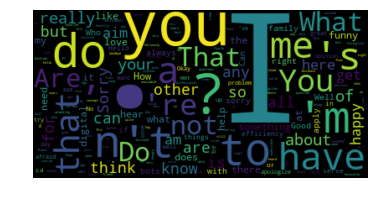

No punctuation but stopwords removed and decapitalisation done


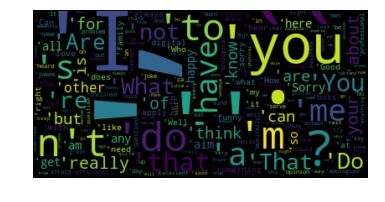

Punctuations, decapitlaisation and stopwords removed


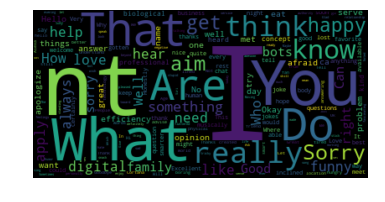

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from word_embedding_model.cpkt
INFO:tensorflow:Restoring parameters from model_professional.cpkt
Start chatting!
User: Hi
Chatbot:  Hello.
User: How are you buddy?
Chatbot:  I don't have family.
User: Oh I see, you are my family
Chatbot:  Well, that's not something I can do.
User: professional personality
Personality changed to Professional
INFO:tensorflow:Restoring parameters from model_professional.cpkt
Start chatting!
User: Hi
Chatbot:  That's not me, but hello.
User: comic personality
Personality changed to Comic
INFO:tensorflow:Restoring parameters from model_comic.cpkt
Start chatting!
User: Hey
Chatbot:  I'm just a series of intelligent formulas masquerading as a personality. So, no family.
User: Ya I know
Chatbot:  Nah, I'm good. Cartoonish supervillainy is beneath me. And beyond me.
User: stopchat
Chatbot stopped


In [17]:
#download dataset 
data = download_data_and_models()

window_skipgram = 5
print("Shows the effect of different types of preprocessing")
call_display_cloud(data[0])
#Preprocess the datsets to create the pre requisites like word dictionary, input word length etc for running the chatbot
all_dicts, all_seq_data, all_max_input_words, all_unique_words, all_max_output_words = preprocess_seq2seq_data(data)
skip_grams, word_list_we, word_dict_we  = preprocess_word_embed_data(data, window_skipgram)

#Load the word embeding model
trained_embeddings = load_word_embed()

#Create respective trained embeddings for seq2seq
all_trained_embeddings = word2vec_answers_average(trained_embeddings, all_dicts, all_unique_words, word_dict_we)


#Prints on the screen as well as txt file
printing_io(all_dicts, all_max_input_words, all_trained_embeddings, all_unique_words, all_max_output_words)

## 3.2. Change Personality

*To change personality, enter command "**professional personality**" or "**friend personality**" or "**comic personality**" respectively during the chat.*

## 3.3. Save chat log

The chat log gets saved on google drive as one starts chatting. Should, one decide to not go with it, he simply needs to stop chat and run the function again and the new chat log will be created.

## 3.4. End chatting

*To end chat type '**stopchat**' or '**stop chat**' while chatting.*

## 3.5. Execute program

***Please make sure your program  is running properly.***

***Functions for downloading (from Google Drive) and loading models (both word embeddings and Seq2Seq) need to be called!*** 


### 3.5.1. Execute program - training mode

*Please include lines to train the bot.*

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
Shows the effect of different types of preprocessing
No punctuation & stopword removal but decapitalisation only


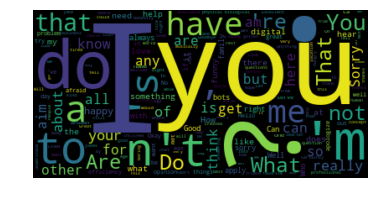

No punctuation but stopwords removed and decapitalisation done


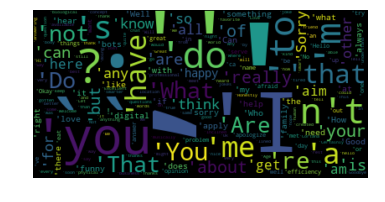

Punctuations, decapitlaisation and stopwords removed


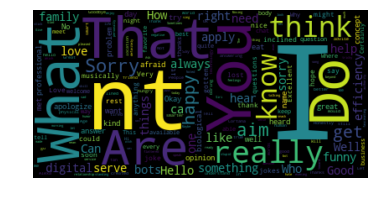

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Training word embedding model: 
Epoch 0, Cost= 169.0108
Epoch 100, Cost= 10.3192
Epoch 200, Cost= 5.4463
Epoch 300, Cost= 4.7466
Epoch 400, Cost= 4.6889
Epoch 500, Cost= 4.4390
Epoch 600, Cost= 4.2194
Epoch 700, Cost= 3.9433
Epoch 800, Cost= 3.9234
Epoch 900, Cost= 3.9232
Epoch 1000, Cost= 3.7102
Epoch 1100, Cost= 3.9919
Epoch 1200, Cost= 3.6850
Epoch 1300, Cost= 3.6676
Epoch 1400, Cost= 3.3446
INFO:tensorflow:Restoring parameters from word_embedding_model.cpkt
The time to preprocess and train the word embedding model is:  155  seconds
Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_

In [18]:
#function to download data
data = download_data_n_writes_to_drive()

#Preprocessing for word embedding model
start = time.time()
window_skipgram = 5
print("Shows the effect of different types of preprocessing")
call_display_cloud(data[0])
skip_grams, word_list_we, word_dict_we  = preprocess_word_embed_data(data, window_skipgram)

#Load word embed model
learning_rate_we = 0.01
embed_size = 16
train_save_word_embed(skip_grams, word_list_we, learning_rate_we, embed_size)
trained_embeddings = load_word_embed()
end = time.time()
print("The time to preprocess and train the word embedding model is: ", math.floor(end-start), " seconds")


start = time.time()

#Preprocessing on seq2seq data
all_dicts, all_seq_data, all_max_input_words, all_unique_words, all_max_output_words = preprocess_seq2seq_data(data)
all_trained_embeddings = word2vec_answers_average(trained_embeddings, all_dicts, all_unique_words, word_dict_we) 

#function to train the bot with three personality
lr = 0.01
n_hidden = 64

train_save_professional(all_unique_words[0], all_dicts[0], all_trained_embeddings[0], all_seq_data[0], all_max_input_words[0], len(all_dicts[0]), lr, n_hidden)
train_save_friend(all_unique_words[1], all_dicts[1], all_trained_embeddings[1], all_seq_data[1], all_max_input_words[1], len(all_dicts[1]), lr, n_hidden)
train_save_comic(all_unique_words[2], all_dicts[2], all_trained_embeddings[2], all_seq_data[2], all_max_input_words[2], len(all_dicts[2]), lr, n_hidden)

end = time.time()
print("The time to preprocess and train the three chat models is: ", math.floor(end-start), " seconds")

print("The cosine similarity score of glad and happy is: ", cosine_similarity(trained_embeddings[word_dict_we['glad']].reshape(1, embed_size), trained_embeddings[word_dict_we['happy']].reshape(1, embed_size)))

### 3.5.2. Execute program - chatting mode

*Please include lines to start chatting with the bot.*

In [19]:
#Starts chatbot and prints on the screen as well as txt file on google drive
printing_io(all_dicts, all_max_input_words, all_trained_embeddings, all_unique_words, all_max_output_words)

INFO:tensorflow:Restoring parameters from model_professional.cpkt
Start chatting!
User: Hi
Chatbot:  Hello.
User: How are you buddy
Chatbot:  I aim to serve.
User: Lets go out for food sometime
Chatbot:  I wouldn't know how to advise about this.
User: friend personality
Personality changed to Friend
INFO:tensorflow:Restoring parameters from model_friend.cpkt
Start chatting!
User: Hi
Chatbot:  Hi! Hello!
User: I love chatting with you
Chatbot:  I heart you too!
User: How are you doing today
Chatbot:  I'm so sorry.
User: comic personality
Personality changed to Comic
INFO:tensorflow:Restoring parameters from model_comic.cpkt
Start chatting!
User: Hi
Chatbot:  Hey.
User: How are you doing today?
Chatbot:  You're looking at it.
User: How about a date with me?
Chatbot:  I have no emotions and no body. It's not the best recipe for romance.
User: stopchat
Chatbot stopped
